In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
sys.path.append('../../')
import Constants as c

In [2]:
file = "calculate_metrics_h2.csv"
df = pd.read_csv(file)

In [3]:
df.drop(df.columns[0], axis=1)
df.dropna(subset=[c.PRED_25], inplace=True)
df.dropna(subset=[c.PRED_50], inplace=True)

In [4]:
# df.describe()

In [5]:
def hypothesisTest_Effort(model, pred, mean):
    print("t-test for: {0}".format(model))
    model_records = df[df[c.MODEL] == model]
    model_records_mean = model_records[pred].mean()
    print(model_records_mean)
    ttest_result = ttest_1samp(model_records[pred], mean)
    print("p-value: ", ttest_result.pvalue / 2)

    if ttest_result.pvalue / 2 < 0.10:
        print("Rejecting null hypothesis!")
    else:
        print("Accepting null hypothesis!")
    
    model_records[c.PRED_25].plot.hist(bins=10, alpha=0.5)


t-test for: Line
0.28661971830985916
p-value:  0.0333213974071048
Rejecting null hypothesis!


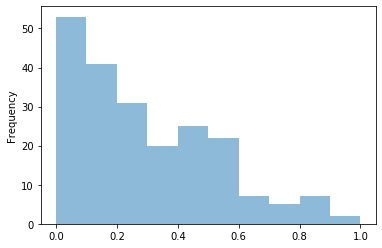

In [6]:
# t-test
hypothesisTest_Effort(c.LINE, c.PRED_25, 0.2563380281690141)

t-test for: Line
0.4437089201877934
p-value:  0.01738688822884569
Rejecting null hypothesis!


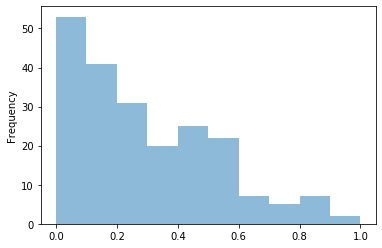

In [7]:
hypothesisTest_Effort(c.LINE, c.PRED_50, 0.4048356807511737)

t-test for: Module
0.4095774647887324
p-value:  0.3947107917485781
Accepting null hypothesis!


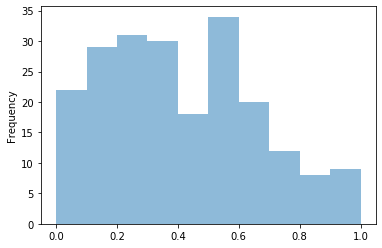

In [8]:
# t-test
hypothesisTest_Effort(c.MODULE, c.PRED_25, 0.4048356807511737)

t-test for: Module
0.6184037558685446
p-value:  0.15999457632932024
Accepting null hypothesis!


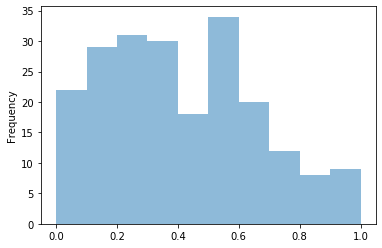

In [9]:
hypothesisTest_Effort(c.MODULE, c.PRED_50, 0.6025821596244131)